In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import unicodedata
import re
import numpy as np
import os
import io
import time

In [2]:
from model_mod import *

In [3]:
BATCH_SIZE = 256

In [4]:
path_to_zip = tf.keras.utils.get_file(
    'spa-eng.zip', origin='http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip',
    extract=True)

path_to_file = os.path.dirname(path_to_zip)+"/spa-eng/spa.txt"

en_sentence = u"May I borrow this book?"
sp_sentence = u"¿Puedo tomar prestado este libro?"
print(preprocess_sentence(en_sentence))
print(preprocess_sentence(sp_sentence).encode('utf-8'))

en, sp = create_dataset(path_to_file, None)
print(en[-1])
print(sp[-1])

# Try experimenting with the size of that dataset
# num_examples = 118964
num_examples = 60000

input_tensor, target_tensor, inp_lang, targ_lang = load_dataset(path_to_file, num_examples)

<start> may i borrow this book ? <end>
b'<start> \xc2\xbf puedo tomar prestado este libro ? <end>'
<start> if you want to sound like a native speaker , you must be willing to practice saying the same sentence over and over in the same way that banjo players practice the same phrase over and over until they can play it correctly and at the desired tempo . <end>
<start> si quieres sonar como un hablante nativo , debes estar dispuesto a practicar diciendo la misma frase una y otra vez de la misma manera en que un musico de banjo practica el mismo fraseo una y otra vez hasta que lo puedan tocar correctamente y en el tiempo esperado . <end>


In [5]:
# input_tensor = input_tensor[-30000:, :]
# target_tensor = target_tensor[-30000:, :]

In [6]:
# Calculate max_length of the target tensors
max_length_targ, max_length_inp = max_length(target_tensor), max_length(input_tensor)

# Creating training and validation sets using an 80-20 split
input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor, target_tensor, test_size=0.2)

BUFFER_SIZE = len(input_tensor_train)
steps_per_epoch = len(input_tensor_train)//BATCH_SIZE
dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

In [7]:
vocab_inp_size = len(inp_lang.word_index)+1
vocab_tar_size = len(targ_lang.word_index)+1

In [8]:
my_model = NMT((vocab_inp_size, vocab_tar_size), inp_lang, targ_lang)

Epoch 1 Loss 2.4510
Time taken for an epoch: 110.3 sec

Epoch 2 Loss 1.8787
Time taken for an epoch: 23.9 sec

Epoch 3 Loss 1.6222
Time taken for an epoch: 23.6 sec

Epoch 4 Loss 1.4445
Time taken for an epoch: 23.7 sec

Epoch 5 Loss 1.2834
Time taken for an epoch: 23.7 sec

Epoch 6 Loss 1.1082
Time taken for an epoch: 24.2 sec

Epoch 7 Loss 0.9310
Time taken for an epoch: 24.0 sec

Epoch 8 Loss 0.7734
Time taken for an epoch: 24.1 sec

Epoch 9 Loss 0.6483
Time taken for an epoch: 23.8 sec

Epoch 10 Loss 0.5451
Time taken for an epoch: 23.8 sec

Epoch 11 Loss 0.4622
Time taken for an epoch: 24.2 sec

Epoch 12 Loss 0.3949
Time taken for an epoch: 24.0 sec

Epoch 13 Loss 0.3469
Time taken for an epoch: 23.7 sec

Epoch 14 Loss 0.3060
Time taken for an epoch: 24.2 sec

Epoch 15 Loss 0.2709
Time taken for an epoch: 23.9 sec

Input: <start> hace mucho frio aqui . <end>
Predicted translation: it s very cold here . <end> 


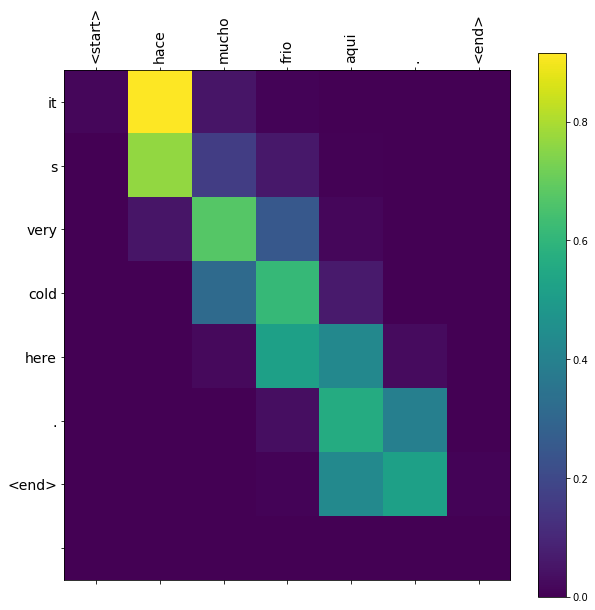

Epoch 16 Loss 0.2426
Time taken for an epoch: 24.1 sec

Epoch 17 Loss 0.2223
Time taken for an epoch: 24.8 sec

Epoch 18 Loss 0.2022
Time taken for an epoch: 24.1 sec

Epoch 19 Loss 0.1850
Time taken for an epoch: 23.7 sec

Epoch 20 Loss 0.1684
Time taken for an epoch: 23.8 sec

Epoch 21 Loss 0.1534
Time taken for an epoch: 22.0 sec

Epoch 22 Loss 0.1391
Time taken for an epoch: 22.3 sec

Epoch 23 Loss 0.1257
Time taken for an epoch: 21.9 sec

Epoch 24 Loss 0.1141
Time taken for an epoch: 21.8 sec

Epoch 25 Loss 0.1055
Time taken for an epoch: 22.7 sec

Epoch 26 Loss 0.0991
Time taken for an epoch: 22.7 sec

Epoch 27 Loss 0.0963
Time taken for an epoch: 22.3 sec

Epoch 28 Loss 0.0964
Time taken for an epoch: 22.2 sec

Epoch 29 Loss 0.0960
Time taken for an epoch: 21.9 sec

Epoch 30 Loss 0.0905
Time taken for an epoch: 21.3 sec

Input: <start> hace mucho frio aqui . <end>
Predicted translation: it s very cold here . <end> 


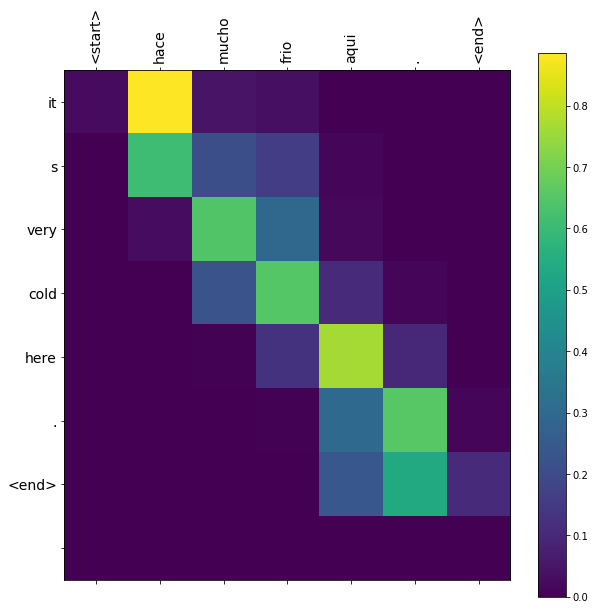

Epoch 31 Loss 0.0836
Time taken for an epoch: 22.2 sec

Epoch 32 Loss 0.0764
Time taken for an epoch: 22.7 sec

Epoch 33 Loss 0.0691
Time taken for an epoch: 22.4 sec

Epoch 34 Loss 0.0619
Time taken for an epoch: 22.4 sec

Epoch 35 Loss 0.0556
Time taken for an epoch: 21.7 sec

Epoch 36 Loss 0.0511
Time taken for an epoch: 22.5 sec

Epoch 37 Loss 0.0477
Time taken for an epoch: 21.9 sec

Epoch 38 Loss 0.0458
Time taken for an epoch: 21.9 sec

Epoch 39 Loss 0.0445
Time taken for an epoch: 22.1 sec

Epoch 40 Loss 0.0443
Time taken for an epoch: 21.5 sec

Epoch 41 Loss 0.0444
Time taken for an epoch: 22.0 sec

Epoch 42 Loss 0.0458
Time taken for an epoch: 22.7 sec

Epoch 43 Loss 0.0467
Time taken for an epoch: 21.9 sec

Epoch 44 Loss 0.0479
Time taken for an epoch: 21.3 sec

Epoch 45 Loss 0.0485
Time taken for an epoch: 22.0 sec

Input: <start> hace mucho frio aqui . <end>
Predicted translation: it s very cold here . <end> 


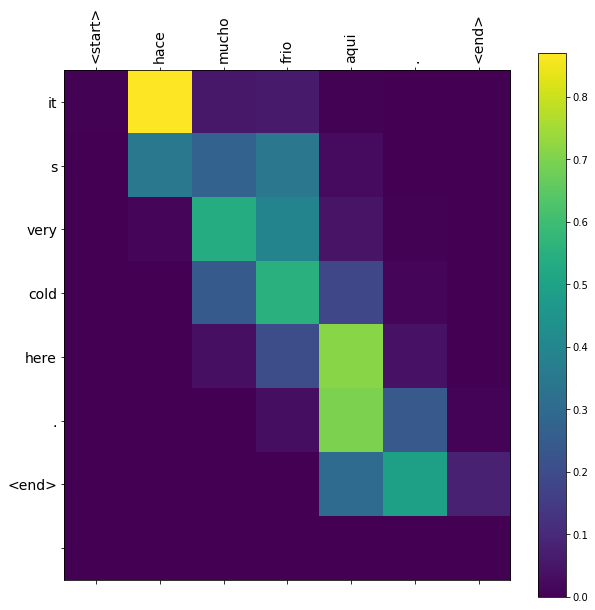

In [9]:
EPOCHS = 45

for epoch in range(EPOCHS):

    start = time.time()

    total_loss = 0

    for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
        batch += 1
        batch_loss = my_model.train(inp, targ)
        total_loss += batch_loss
        
#         if batch % 150 == 0:
#             print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
#                                                          batch,
#                                                          batch_loss.numpy()))
#             print('Time taken for 1 batch {:.1f} sec\n'.format(time.time() - start))

    print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                  total_loss / steps_per_epoch))
    print('Time taken for an epoch: {:.1f} sec\n'.format(time.time() - start))
    
#     my_model.translate(u'hace mucho frio aqui.', max_length_targ, max_length_inp)

    
    if (epoch + 1) % 15 == 0:
        my_model.translate(u'hace mucho frio aqui.', max_length_targ, max_length_inp)

Input: <start> hace mucho frio aqui . <end>
Predicted translation: it s very cold here . <end> 


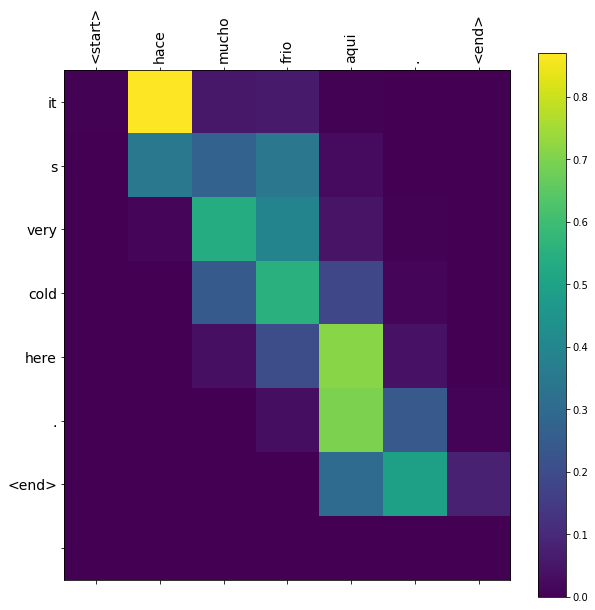

In [14]:
my_model.translate(u'hace mucho frio aqui.', max_length_targ, max_length_inp)

Input: <start> esta es mi vida . <end>
Predicted translation: this is my life . <end> 


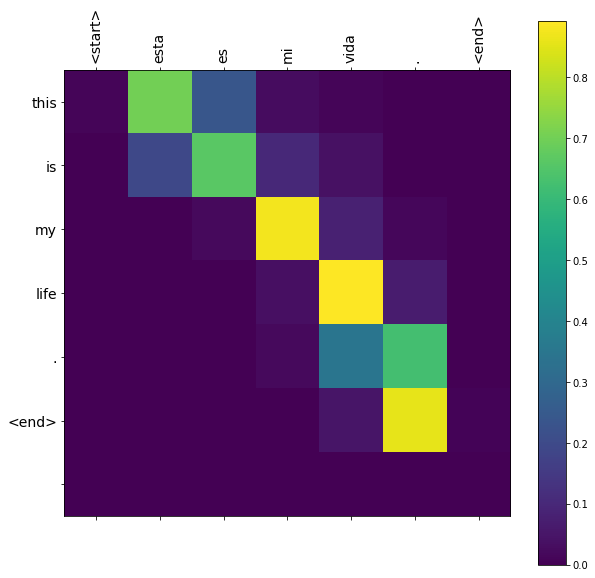

In [15]:
my_model.translate(u'esta es mi vida.', max_length_targ, max_length_inp)

Input: <start> ¿ todavia estan en casa ? <end>
Predicted translation: are you still at home ? <end> 


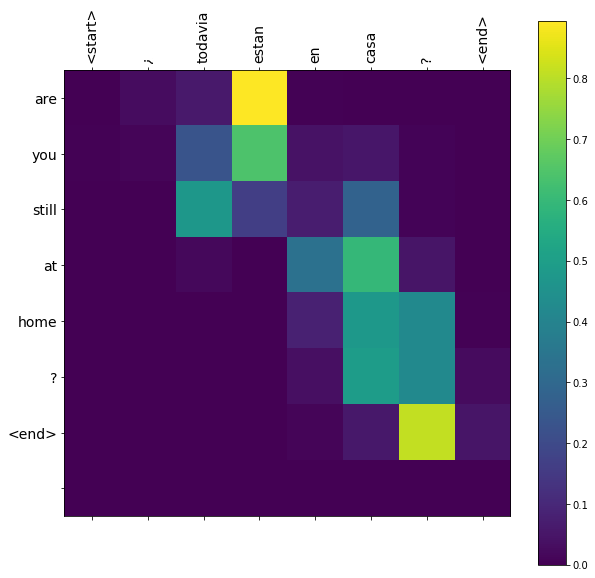

In [16]:
my_model.translate(u'¿todavia estan en casa?', max_length_targ, max_length_inp)

Input: <start> ¿ hay algun problema que pueda ayudar ? <end>
Predicted translation: is there the problem can help us ? <end> 


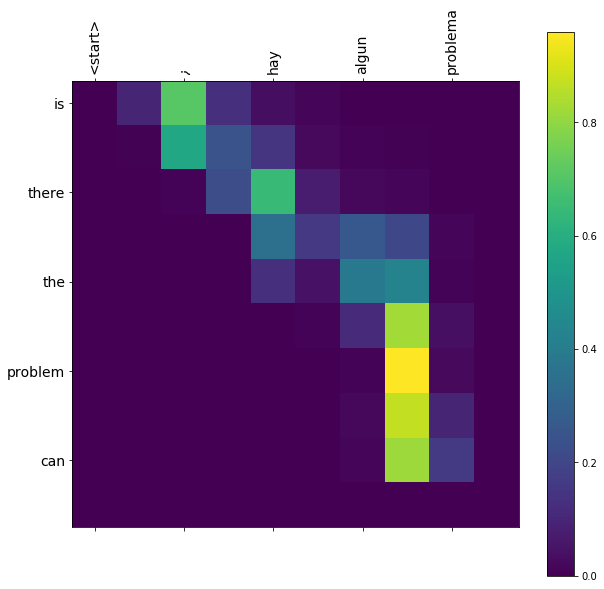

In [17]:
# wrong translation
my_model.translate(u'¿Hay algún problema que pueda ayudar?', max_length_targ, max_length_inp)